# Proyecto Semestral

![](https://www.googleapis.com/download/storage/v1/b/kaggle-user-content/o/inbox%2F4895752%2F391fac1718d81b6c7cf0b53eb231d562%2Finbox_4895752_5e4735cb769c6be5f5872a052d0007e2_841520521_preview_20170113163124_2.jpg?generation=1597574096430659&alt=media)

## Integrantes
* Felipe Miranda Rebolledo
* Patricia Gonzalez Caamaño
* Hallam Saavedra Álvarez

Observaciones:
* Estuvimos trabajando 3 personas en el proyecto, pero nos enteramos recién hoy 07 de Octubre que el trabajo se realizaba en parejas. Básicamente fue un error de información. Esperamos su comprensión y que no sea un problema para la evaluación del proyecto.

## Entrega 1

### Importación de Librerías

In [1]:
# Importamos las librerias necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp

from sklearn.linear_model import LinearRegression # Regresion Lineal
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error # Metricas de evaluacion
from sklearn.model_selection import train_test_split # Particion de datos

### Carga y visualización de Data

In [2]:
# Cargamos la data
data_frame = pd.read_csv("docs/demo_round_traces.csv", sep=";") # Cargamos el archivo csv
data_frame

,Unnamed: 0,Map,Team,InternalTeamId,MatchId,RoundId,SteamId,RoundWinner,MatchWinner,Survived,...,RoundAssists,RoundHeadshots,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots,AvgMatchKillDist
0,600,de_inferno,Terrorist,1,4,1,76561198036987787,False,True,False,...,0,0,0,750,4400,0,0,0,0,501379.183091
1,601,de_inferno,Terrorist,1,4,1,76561197971812216,False,True,False,...,0,0,0,800,4400,0,0,0,0,208807.587297
2,602,de_inferno,Terrorist,1,4,1,76561197972240652,False,True,False,...,0,0,0,1000,4400,0,0,0,0,381652.027911
3,603,de_inferno,Terrorist,1,4,1,76561197975824962,False,True,False,...,0,0,0,850,4400,0,0,0,0,289754.503091
4,604,de_inferno,Terrorist,1,4,1,76561197960331095,False,True,True,...,0,0,0,1000,4400,0,0,0,0,254527.691176
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79152,123775,de_mirage,CounterTerrorist,2,511,5,76561198024905796,False,False,False,...,0,0,0,5600,27100,4,0,2,2,768003.878843
79153,123776,de_mirage,CounterTerrorist,2,511,5,76561198000020858,False,False,False,...,0,1,0,5500,27100,8,5,1,3,692262.605640
79154,123777,de_mirage,CounterTerrorist,2,511,5,76561198013485667,False,False,False,...,0,0,0,4950,27100,5,0,2,3,161310.783653
79155,123778,de_mirage,CounterTerrorist,2,511,5,76561197972003061,False,False,False,...,0,0,0,4950,27100,1,0,1,0,984575.199373


## Pregunta 1:
**¿Cuál es el mapa con mayor cantidad de tiros a la cabeza y de qué equipo fue?**

In [3]:
# Seleccionar columnas a utilizar
column_select = data_frame[["Map", "Team", "InternalTeamId", "MatchHeadshots"]]
column_select

,Map,Team,InternalTeamId,MatchHeadshots
0,de_inferno,Terrorist,1,0
1,de_inferno,Terrorist,1,0
2,de_inferno,Terrorist,1,0
3,de_inferno,Terrorist,1,0
4,de_inferno,Terrorist,1,0
...,...,...,...,...
79152,de_mirage,CounterTerrorist,2,2
79153,de_mirage,CounterTerrorist,2,3
79154,de_mirage,CounterTerrorist,2,3
79155,de_mirage,CounterTerrorist,2,0


In [4]:
# Obtenemos el promedio de headshots por mapa
headshots_mean = column_select.groupby("Map")["MatchHeadshots"].mean()
# Ver dos decimales
headshots_mean = headshots_mean.round(2)
headshots_mean

Map
de_dust2      3.89
de_inferno    3.96
de_mirage     3.63
de_nuke       3.94
Name: MatchHeadshots, dtype: float64

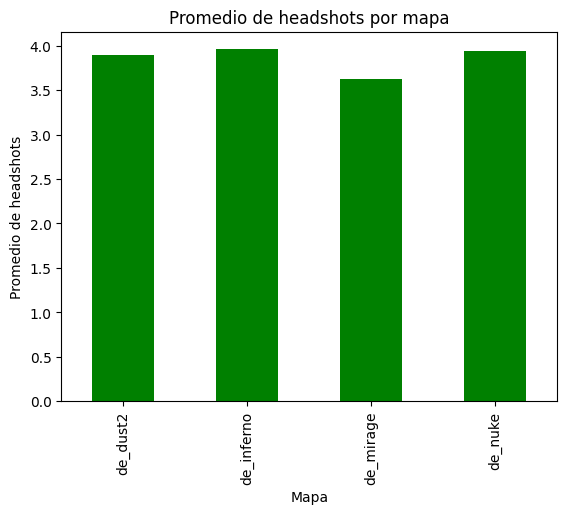

In [5]:
# Graficamos el promedio de headshots por mapa
headshots_mean.plot(kind="bar", color="green")
plt.title("Promedio de headshots por mapa")
plt.ylabel("Promedio de headshots")
plt.xlabel("Mapa")
plt.show()

Podemos notar que el mapa donde más tiros a la cabeza se realizan es en **"de_inferno"**

In [6]:
# Saber que equipo da mas headshots en el mapa de inferno
inferno = column_select[column_select["Map"] == "de_inferno"]
inferno = inferno.groupby("Team")["MatchHeadshots"].mean()
inferno = inferno.round(2)
inferno

Team
CounterTerrorist    4.04
Terrorist           3.87
Name: MatchHeadshots, dtype: float64

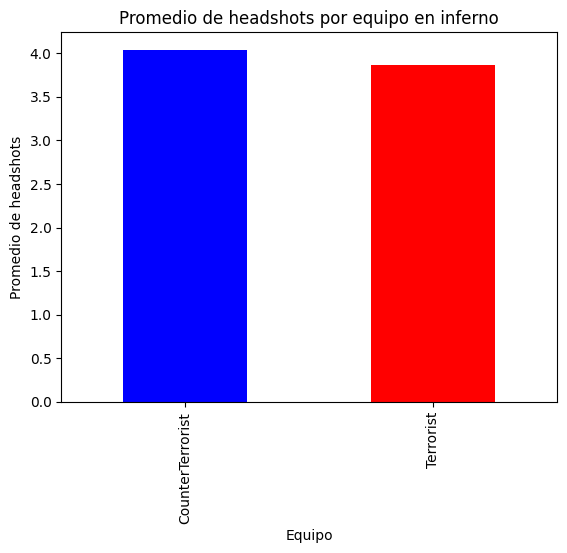

In [7]:
# Graficamos el promedio de headshots por equipo en el mapa de inferno
set_color = ["blue", "red"]
inferno.plot(kind="bar", color=set_color)
plt.title("Promedio de headshots por equipo en inferno")
plt.ylabel("Promedio de headshots")
plt.xlabel("Equipo")
plt.show()

**Respuesta:** Podemos ver que el mapa en el que más Headshots se realizan es en el **"de_inferno"** y el equipo quien los realiza es el **"CounterTerrorist"**

## Pregunta 2:
* ¿En que mapa se suele ocupar más el Sniper Rifle, cual es el equipo que opta por usar el arma?

In [8]:
# Seleccionar columnas a utilizar
column_select = data_frame[["Map", "Team", "MatchKills", "PrimarySniperRifle"]]
column_select

,Map,Team,MatchKills,PrimarySniperRifle
0,de_inferno,Terrorist,0,0.0
1,de_inferno,Terrorist,0,0.0
2,de_inferno,Terrorist,0,0.0
3,de_inferno,Terrorist,0,0.0
4,de_inferno,Terrorist,0,0.0
...,...,...,...,...
79152,de_mirage,CounterTerrorist,4,0.0
79153,de_mirage,CounterTerrorist,8,0.0
79154,de_mirage,CounterTerrorist,5,0.0
79155,de_mirage,CounterTerrorist,1,1.0


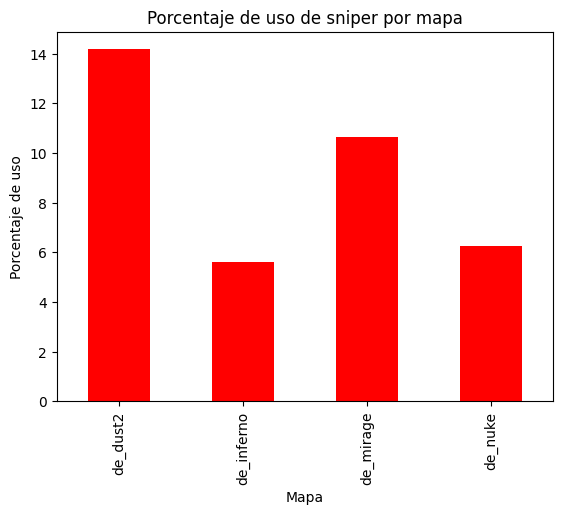

In [9]:
# En que mapa se utilizo mas el sniper
sniper = column_select.groupby("Map")["PrimarySniperRifle"].mean()

# Lo convertimos a porcentaje
sniper = sniper * 100
# Grafiacamos el porcentaje de uso de sniper por mapa
sniper.plot(kind="bar", color="red")
plt.title("Porcentaje de uso de sniper por mapa")
plt.ylabel("Porcentaje de uso")
plt.xlabel("Mapa")
plt.show()

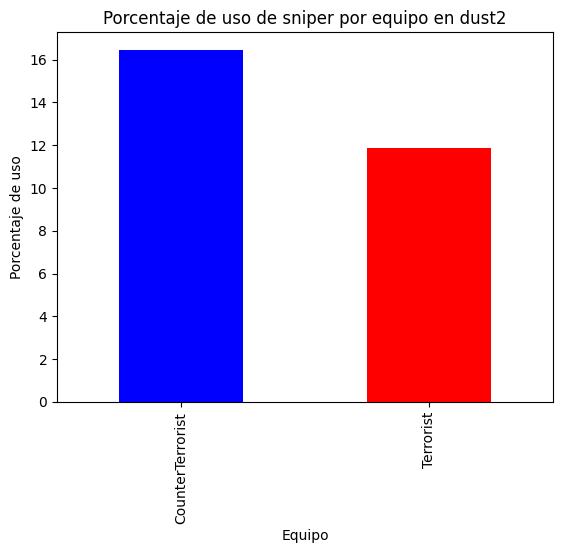

In [10]:
# Equipo que mas uso el sniper en el mapa de_dust2
dust2 = column_select[column_select["Map"] == "de_dust2"]
dust2 = dust2.groupby("Team")["PrimarySniperRifle"].mean()
dust2 = dust2 * 100
dust2

# Graficamos el porcentaje de uso de sniper por equipo en el mapa de_dust2
set_color = ["blue", "red"]
dust2.plot(kind="bar", color=set_color)
plt.title("Porcentaje de uso de sniper por equipo en dust2")
plt.ylabel("Porcentaje de uso")
plt.xlabel("Equipo")
plt.show()


**Respuesta:** El sniper es más utilizado en el mapa **"de_dust2"** y el equipo que más la suele utilizar en aquel mapa es el **"CounterTerrorist"**

## Pregunta 3:
* ¿Cual es el mapa más jugado y que arma se utiliza más en el por cada equipo?

In [11]:
# Seleccionar columnas a utilizar
column_select = data_frame[["Map", "Team", 'PrimaryAssaultRifle', 'PrimarySniperRifle', 'PrimaryHeavy', 'PrimarySMG', 'PrimaryPistol']]
# Obtenemos la cantidad de veces que se jugo en cada mapa
map_count = column_select.groupby("Map").size()
# Total de veces que se jugo
total = map_count.sum()

# Obtenemos el porcentaje de veces que se jugo en cada mapa
map_count = map_count / total * 100
map_count = map_count.round(2)
map_count

# Promedio de uso de armas por mapa
wp_prom = column_select.groupby("Map")[['PrimaryAssaultRifle', 'PrimarySniperRifle', 'PrimaryHeavy', 'PrimarySMG', 'PrimaryPistol']].mean()
# Lo convertimos a porcentaje
wp_prom = (wp_prom * 100).round(2)
wp_prom


,PrimaryAssaultRifle,PrimarySniperRifle,PrimaryHeavy,PrimarySMG,PrimaryPistol
Map,,,,,
de_dust2,63.02,14.17,0.29,0.55,21.96
de_inferno,71.51,5.60,0.80,0.92,21.17
de_mirage,64.93,10.65,0.45,0.67,23.30
de_nuke,69.28,6.24,0.82,0.49,23.17


Text(0, 0.5, '')

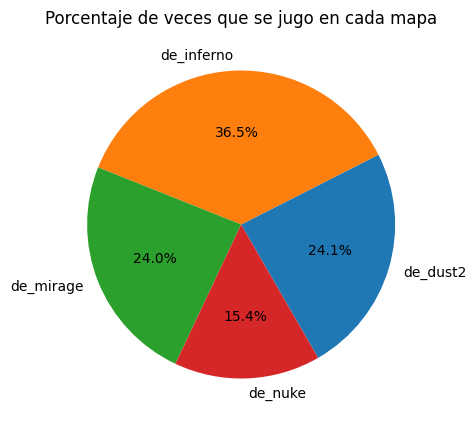

In [12]:
# Crear gráfico de torta para mostrar el porcentaje de veces que se jugo en cada mapa
map_count.plot(kind="pie", figsize=(5, 5), autopct='%1.1f%%', shadow=False, startangle=300)
plt.title("Porcentaje de veces que se jugo en cada mapa")
plt.ylabel("")

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

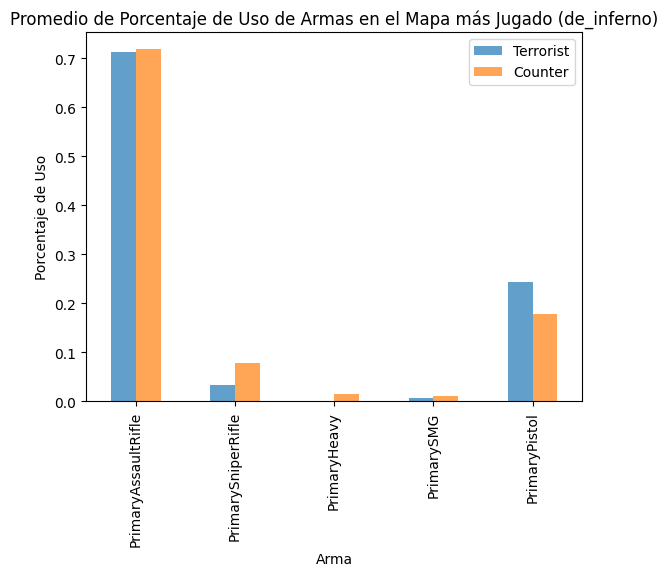

In [13]:
# Encuentra el mapa más jugado
mapa_mas_jugado = data_frame['Map'].value_counts().idxmax()

# Filtra el DataFrame para obtener solo las filas correspondientes al mapa más jugado
df_mapa_mas_jugado = data_frame[data_frame['Map'] == mapa_mas_jugado]

# Calcula el promedio de porcentaje de uso de cada arma para el equipo Terrorist y el equipo CounterTerrorist en el mapa más jugado
promedio_porcentaje_armas_terrorist = df_mapa_mas_jugado[df_mapa_mas_jugado['Team'] == 'Terrorist'][['PrimaryAssaultRifle', 'PrimarySniperRifle', 'PrimaryHeavy', 'PrimarySMG', 'PrimaryPistol']].mean()
promedio_porcentaje_armas_counter = df_mapa_mas_jugado[df_mapa_mas_jugado['Team'] == 'CounterTerrorist'][['PrimaryAssaultRifle', 'PrimarySniperRifle', 'PrimaryHeavy', 'PrimarySMG', 'PrimaryPistol']].mean()

# Crear un gráfico de barras dobles para mostrar el promedio de uso de cada arma para cada equipo en el mapa más jugado
plt.figure(figsize=(10, 6))
index = promedio_porcentaje_armas_terrorist.index


promedios_combinados = pd.concat([promedio_porcentaje_armas_terrorist, promedio_porcentaje_armas_counter], axis=1)
promedios_combinados.columns = ['Terrorist', 'Counter']

# Crea un gráfico de barras dobles utilizando .plot()
plt.figure(figsize=(10, 6))
promedios_combinados.plot(kind='bar', alpha=0.7)

plt.title(f"Promedio de Porcentaje de Uso de Armas en el Mapa más Jugado ({mapa_mas_jugado})")
plt.xlabel("Arma")
plt.ylabel("Porcentaje de Uso")
plt.legend(["Terrorist", "Counter"])
plt.show()


**Respuesta:** El mapa más jugado es el mapa **"de_inferno"** y la arma más utilzada es **"PrimaryAssaultRifle"**, tanto por Terrorist como por CounterTerrorist

## Pregunta 4
¿Cuál es la arma más utilizada en los mapas?

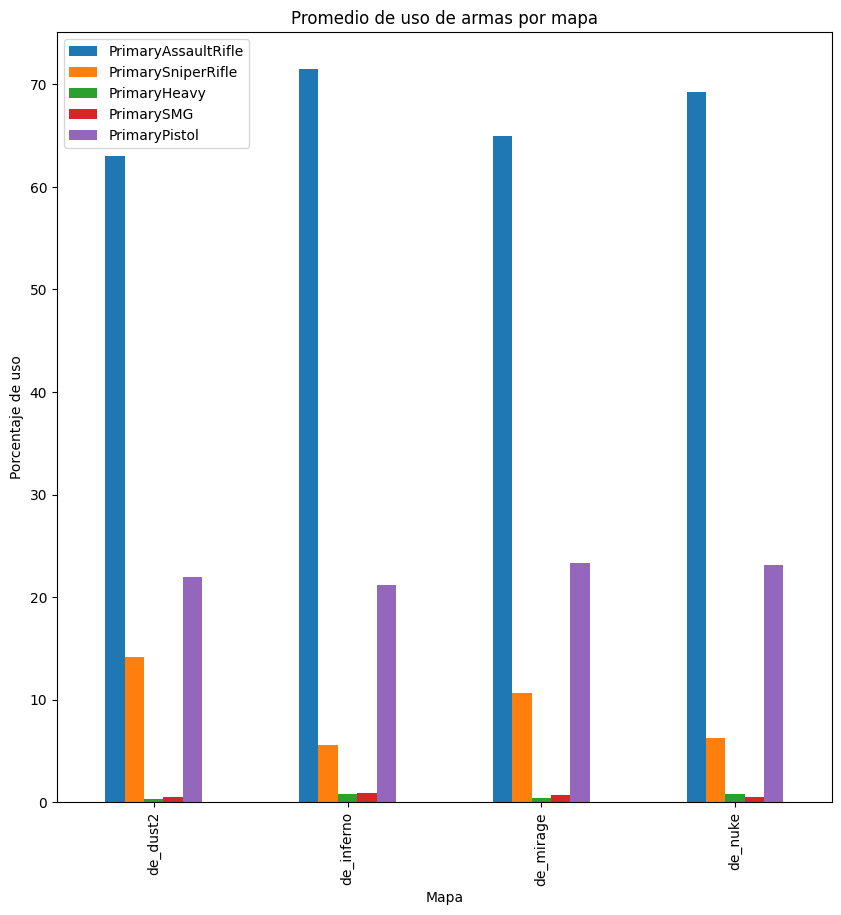

In [14]:
# Graficamos el porcentaje de uso de armas por mapa, con una barra diferente para cada arma
wp_prom.plot(kind="bar", stacked=False, figsize=(10, 10))
plt.title("Promedio de uso de armas por mapa")
plt.ylabel("Porcentaje de uso")
plt.xlabel("Mapa")
plt.show()

Podemos ver que la arma más utilizada a nivel general es la categoría **"PrimaryAssaultRifle"**

# Regresión Lineal

## Mapa de Calor general
Se utilizará un mapa de calor general para poder escoger con mayor determinación las columnas a trabajar

Text(0.5, 1.0, 'Correlación de Variables')

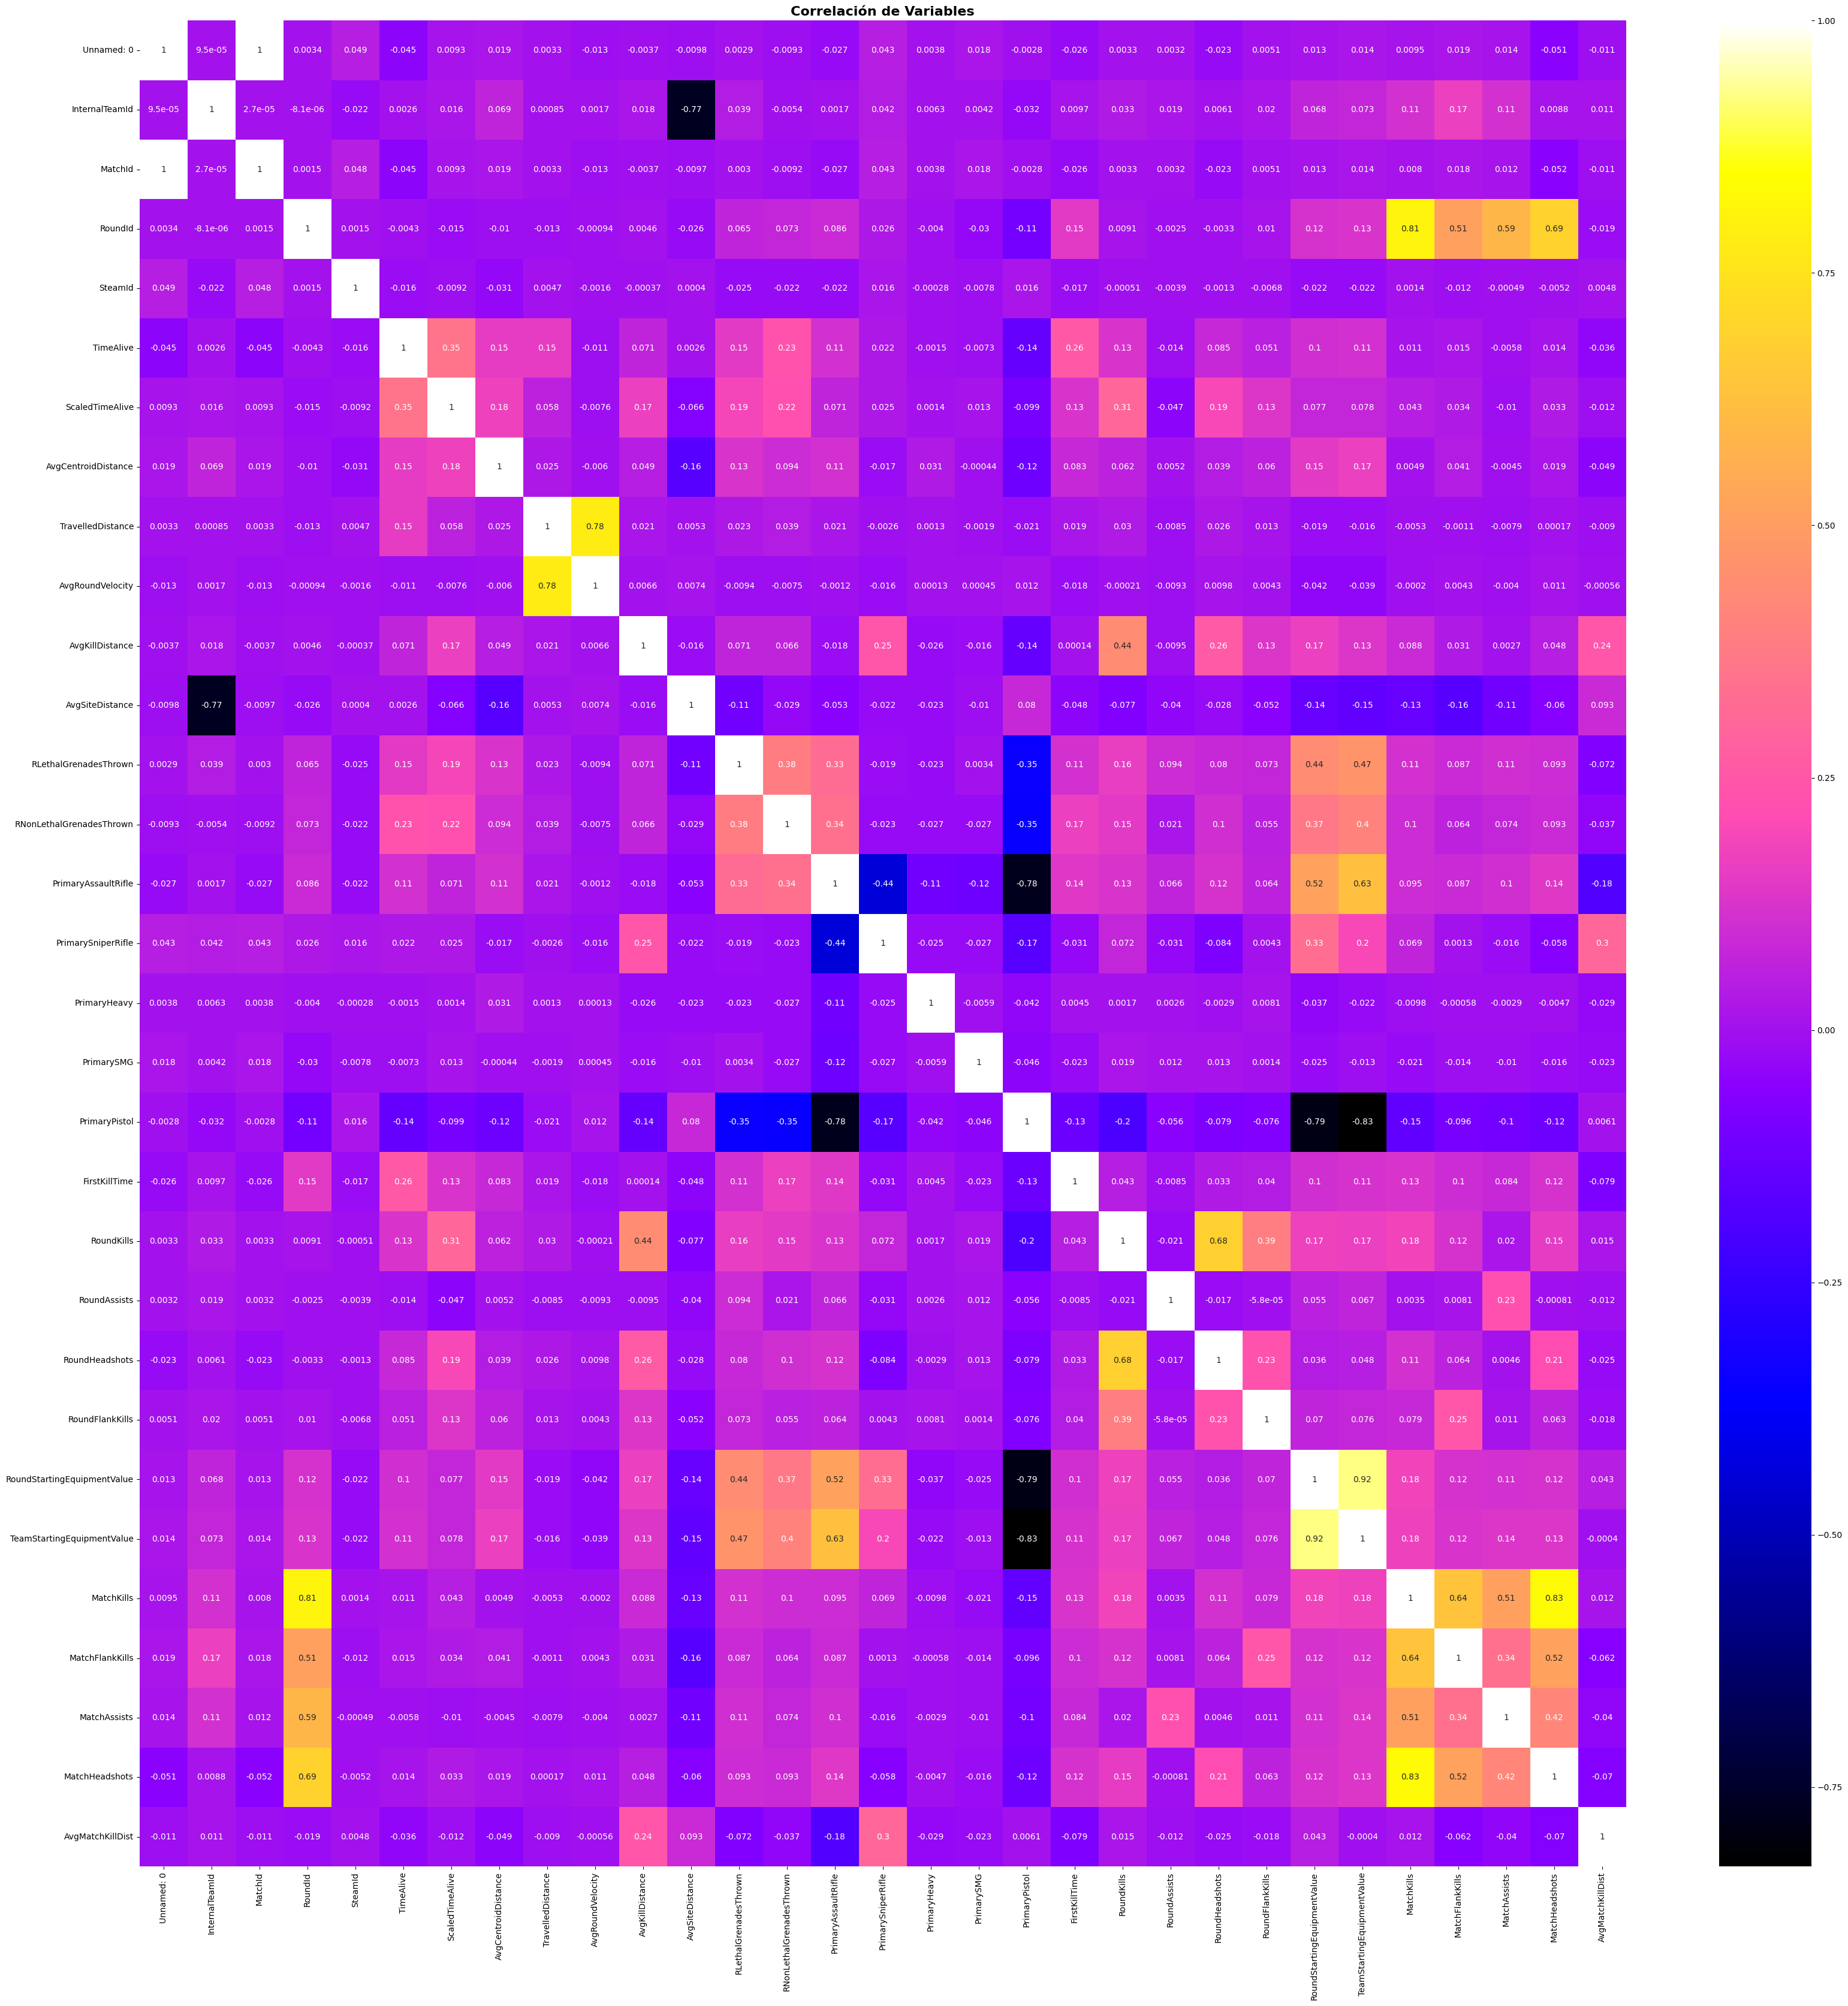

In [15]:
# Creación de un mapa de calor para ver la correlación entre las variables
f, ax = plt.subplots(1, 1, figsize=(40, 40)) # Creamos la figura. 1 fila, 1 columna, tamaño 8x8
ax = sns.heatmap(data_frame[data_frame.describe().columns].corr(), annot=True, cmap='gnuplot2') # Creamos el mapa de calor. El metodo corr() calcula la correlacion entre las variables.
plt.title("Correlación de Variables", fontsize=16, fontweight="bold") # Titulo del grafico

In [16]:
data_frame.columns

Index(['Unnamed: 0', 'Map', 'Team', 'InternalTeamId', 'MatchId', 'RoundId',
       'SteamId', 'RoundWinner', 'MatchWinner', 'Survived', 'AbnormalMatch',
       'TimeAlive', 'ScaledTimeAlive', 'AvgCentroidDistance',
       'TravelledDistance', 'AvgRoundVelocity', 'AvgKillDistance',
       'AvgSiteDistance', 'RLethalGrenadesThrown', 'RNonLethalGrenadesThrown',
       'PrimaryAssaultRifle', 'PrimarySniperRifle', 'PrimaryHeavy',
       'PrimarySMG', 'PrimaryPistol', 'FirstKillTime', 'RoundKills',
       'RoundAssists', 'RoundHeadshots', 'RoundFlankKills',
       'RoundStartingEquipmentValue', 'TeamStartingEquipmentValue',
       'MatchKills', 'MatchFlankKills', 'MatchAssists', 'MatchHeadshots',
       'AvgMatchKillDist'],
      dtype='object')

## Seleccionamos columnas más relevantes a utilizar

In [17]:
# Selección de variables a utilizar
df_select = data_frame[['AvgMatchKillDist', 'AvgKillDistance', 'MatchKills', 'RoundStartingEquipmentValue', 'PrimaryAssaultRifle', 'PrimarySniperRifle',
                        'Map', 'Team','TimeAlive', 'RoundKills']]
df_select

,AvgMatchKillDist,AvgKillDistance,MatchKills,RoundStartingEquipmentValue,PrimaryAssaultRifle,PrimarySniperRifle,Map,Team,TimeAlive,RoundKills
0,501379.183091,0.000000,0,750,0.0,0.0,de_inferno,Terrorist,51.120249,0
1,208807.587297,0.000000,0,800,0.0,0.0,de_inferno,Terrorist,43.486626,0
2,381652.027911,0.000000,0,1000,0.0,0.0,de_inferno,Terrorist,37.354698,0
3,289754.503091,0.000000,0,850,0.0,0.0,de_inferno,Terrorist,47.678861,0
4,254527.691176,0.000000,0,1000,0.0,0.0,de_inferno,Terrorist,53.122511,0
...,...,...,...,...,...,...,...,...,...,...
79152,768003.878843,0.000000,4,5600,1.0,0.0,de_mirage,CounterTerrorist,34.027207,0
79153,692262.605640,109345.366682,8,5500,1.0,0.0,de_mirage,CounterTerrorist,29.261054,1
79154,161310.783653,0.000000,5,4950,1.0,0.0,de_mirage,CounterTerrorist,59.147178,0
79155,984575.199373,0.000000,1,4950,0.0,1.0,de_mirage,CounterTerrorist,42.582843,0


## Creamos Mapa de calor
* El propósito es ver la correlación entre la variable objetivo **"AvgMatchKillDist"** y las demás variables.

Seleccionamos **"AvgMatchKillDist"** ya al ser cuantitativa continua pensamos que puede depender de varios factores dentro de una partida. Si vemos el mapa general vemos está correlaciona con varias otras

Text(0.5, 1.0, 'Correlación de Variables')

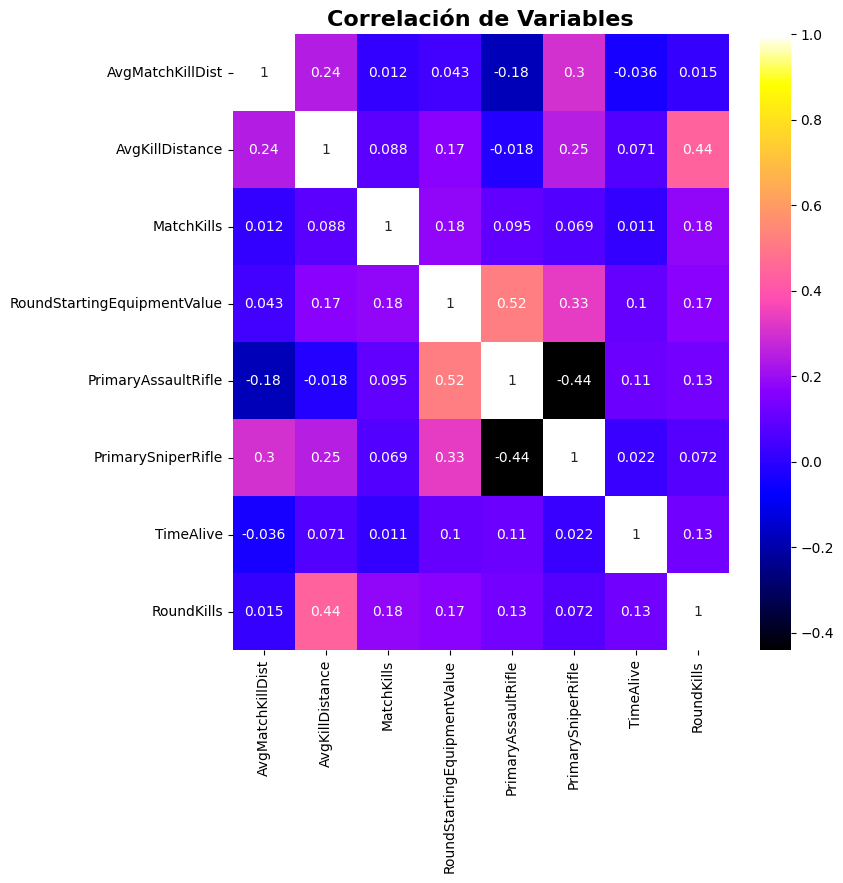

In [18]:
# Creación de un mapa de calor para ver la correlación entre las variables
f, ax = plt.subplots(1, 1, figsize=(8, 8)) # Creamos la figura. 1 fila, 1 columna, tamaño 8x8
ax = sns.heatmap(df_select[df_select.describe().columns].corr(), annot=True, cmap='gnuplot2') # Creamos el mapa de calor. El metodo corr() calcula la correlacion entre las variables.
plt.title("Correlación de Variables", fontsize=16, fontweight="bold") # Titulo del grafico

---

**Análisis**

---

Podemos ver que la variable **"AvgMatchKillDist"** tiene una correlación positiva más fuerte con las variables **"AvgKillDistance"**, **"PrimarySniperRifle"** y una más debil pero igualmente positiva con **"RoundStartingEquipmentValue"**. Esto quiere decir que si estás variables aumentan, por ende, mayor será la distancia promedio entre asesinatos en una partida.


## Primeras Tablas
Utilizaremos las variables positivas más relevantes

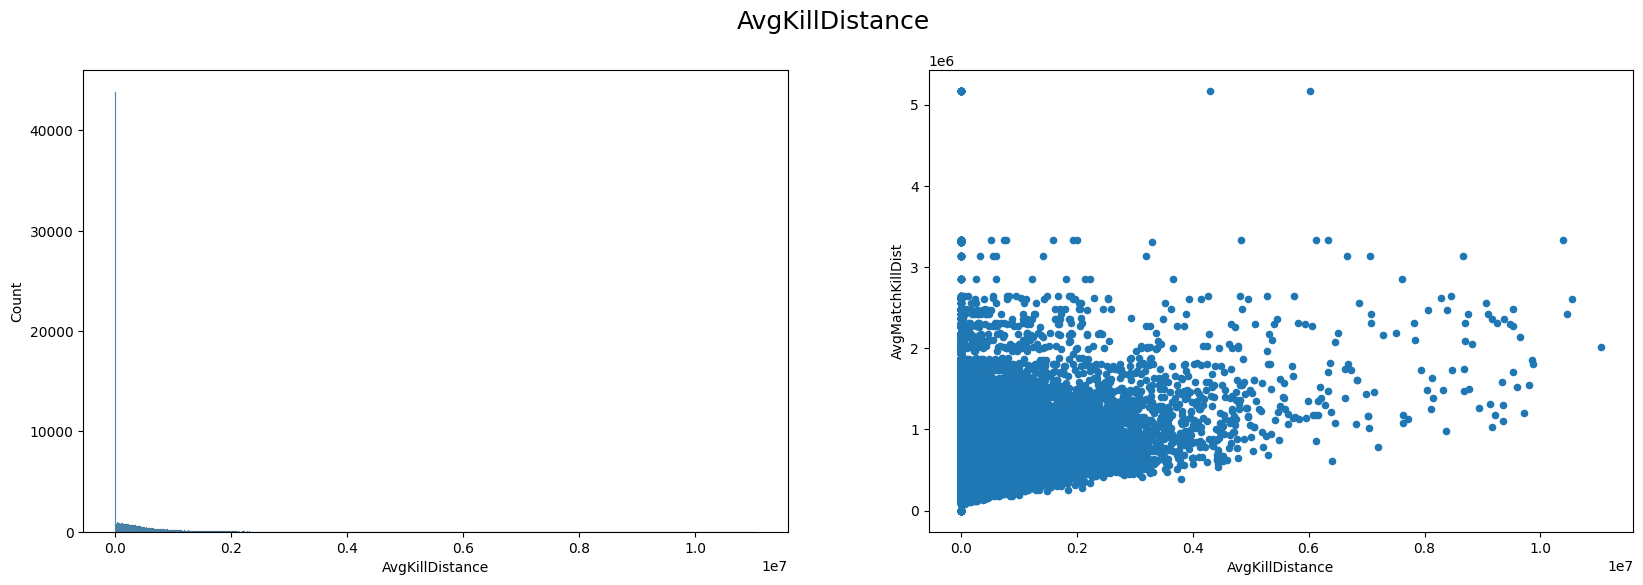

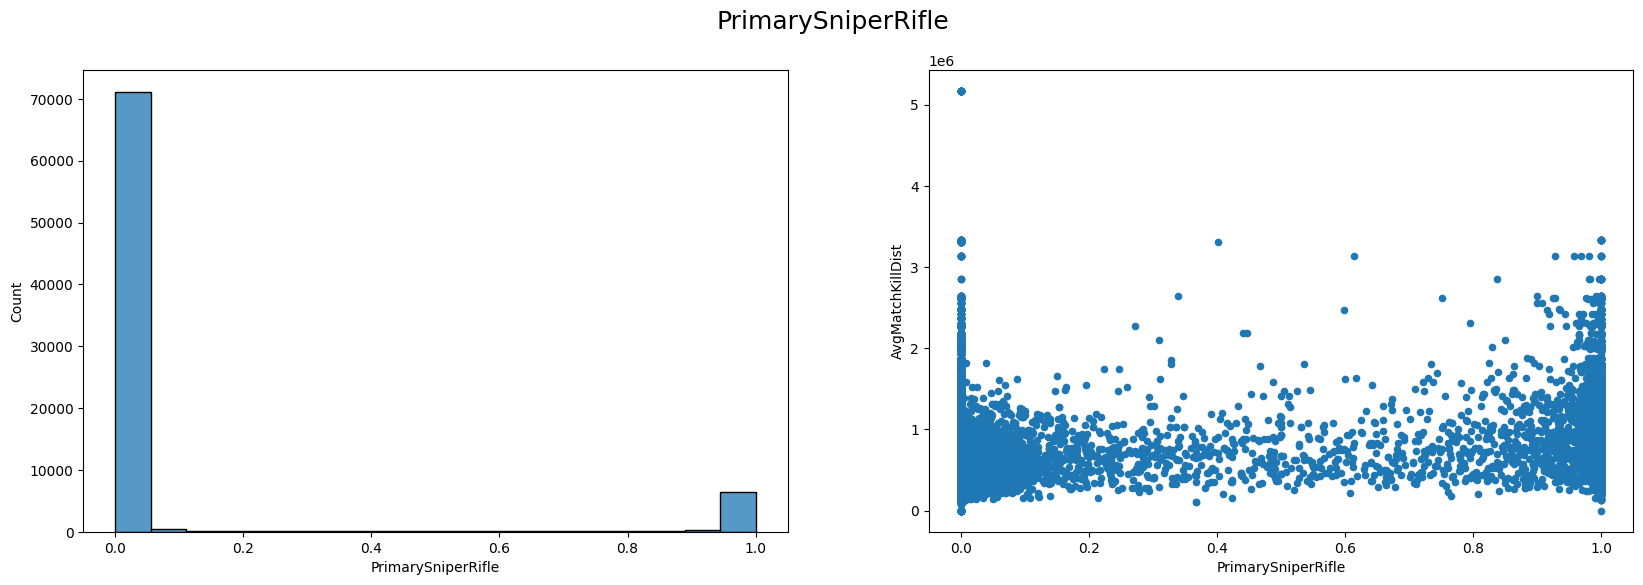

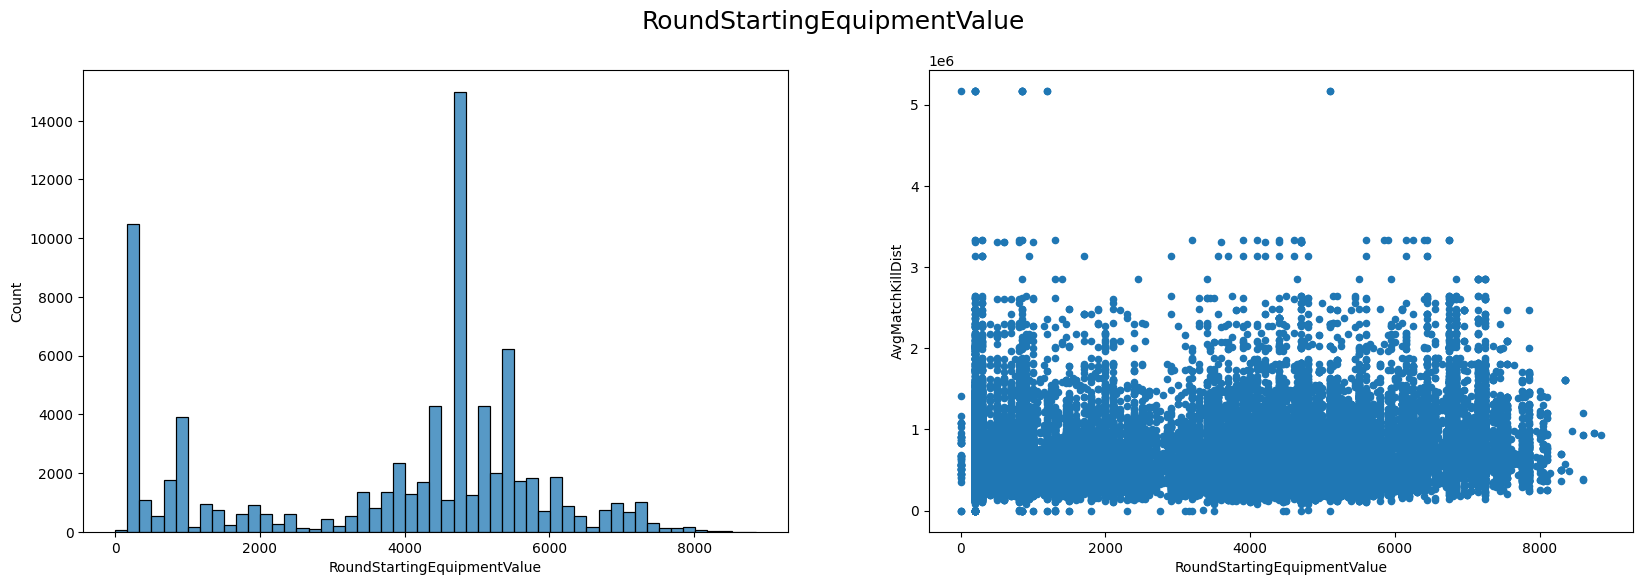

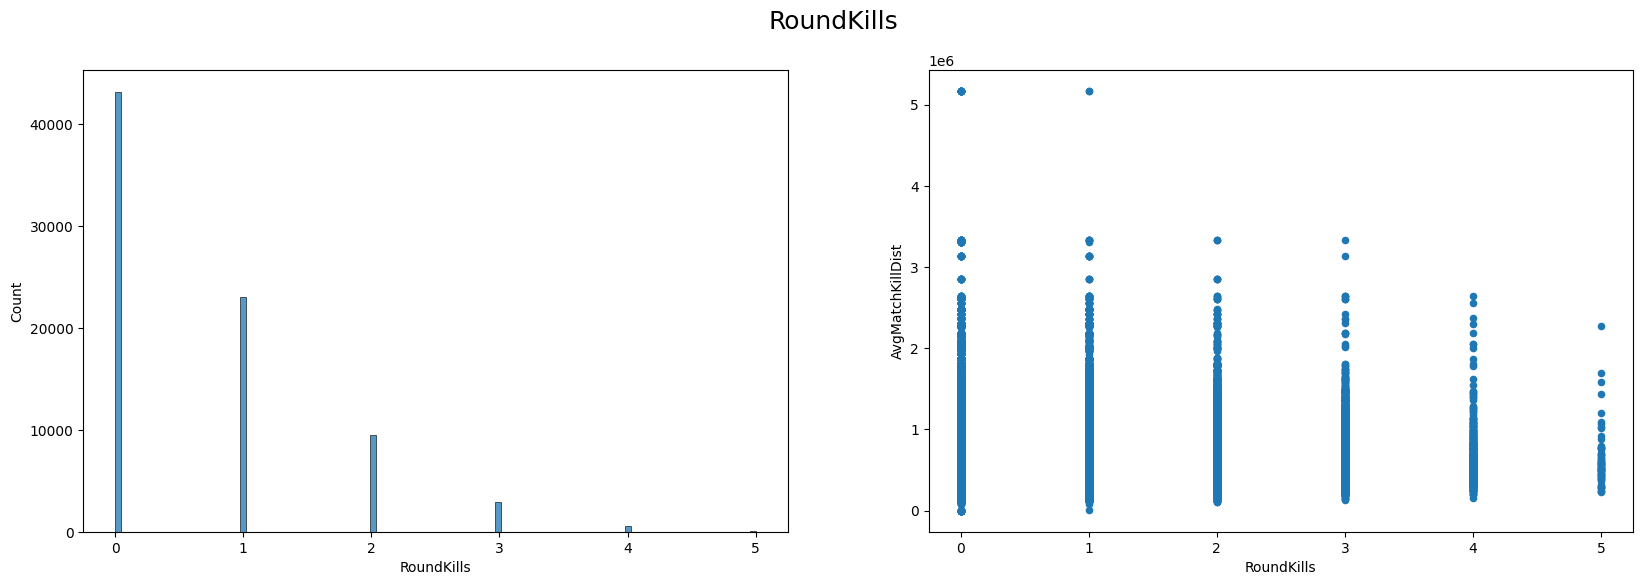

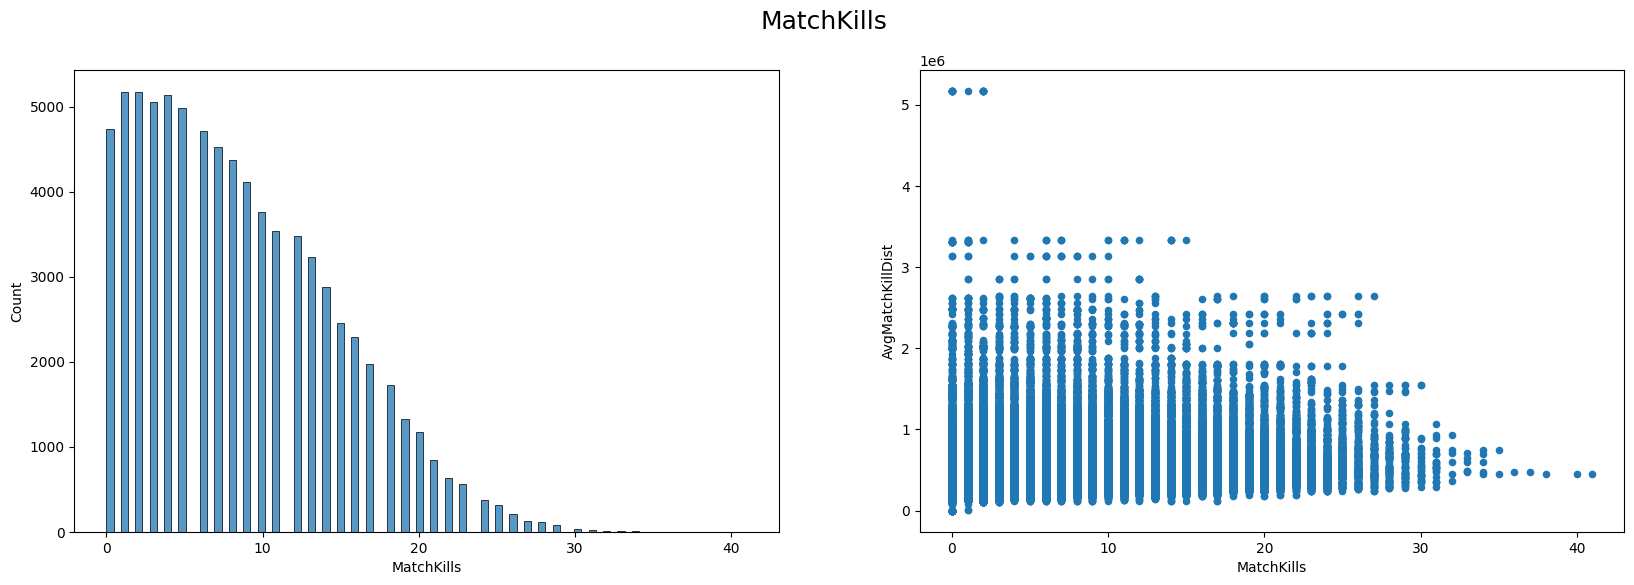

In [19]:
for col in ['AvgKillDistance', 'PrimarySniperRifle', 'RoundStartingEquipmentValue', 'RoundKills', 'MatchKills']:
    fig, ax = plt.subplots(1, 2, figsize=(20, 6))
    fig.suptitle(col, fontsize=18)
    sns.histplot(data_frame[col], ax=ax[0], kde=False)
    data_frame[[col]+['AvgMatchKillDist']].plot.scatter(x=col, y='AvgMatchKillDist', ax=ax[1])
    plt.show()

## Regresión Lineal

In [20]:
# Separamos la data en dos grupos: X (variables independientes) e y (variable dependiente)
x = df_select[['AvgKillDistance', 'PrimarySniperRifle', 'RoundStartingEquipmentValue', 'RoundKills', 'MatchKills']] # Variables predictoras
y = df_select["AvgMatchKillDist"] # Variable a predecir

In [21]:
# Crear el modelo de regresion lineal
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=29) # Particion de los datos. 80% entrenamiento, 20% prueba
# Creamos el modelo
model = LinearRegression()
# Entrenamos el modelo
model.fit(x_train, y_train)
# Validamos el modelo
y_pred = model.predict(x_test)

In [22]:
# Evaluamos el modelo
print(f"R2: {r2_score(y_test, y_pred):.4f}") # Coeficiente de determinacion. Mide la proporcion de la varianza total de la variable dependiente que es explicada por la regresion
print(f"MSE: {mean_squared_error(y_test, y_pred):.4f}") # Error cuadratico medio. Mide la diferencia entre los valores predichos y los valores observados
print(f"MAE: {mean_absolute_error(y_test, y_pred):.4f}") # Error absoluto medio. Mide la diferencia entre los valores predichos y los valores observados
print(f"Score del modelo en entrenamiento: {model.score(x_train, y_train):.4f}") # Score del modelo en entrenamiento
print(f"Score del modelo en prueba: {model.score(x_test, y_test):.4f}") # Score del modelo en prueba

R2: 0.1285
MSE: 99877573139.5688
MAE: 219973.5892
Score del modelo en entrenamiento: 0.1361
Score del modelo en prueba: 0.1285


---

**Análisis**

---

* Podemos ver que el $R^{2}$ es de 0.1285, no es suficiente pero es algo por donde empezar.
* El error cuadrático medio es de 99877573139.5688 lo que es muy alto, por lo que no es un buen modelo.
* El error absoluto medio es de 219973.5892 lo que es muy alto, por lo que tambien es indicación de que no es un buen modelo.
* Para mejorar el modelo se considerará incluir variables categóricas.

In [23]:
# Guardamos los resultados del MAE (Error absoluto medio) en una lista
history_mae = []
history_mae.append(mean_absolute_error(y_test, y_pred))

# Guardamos los resultados del R2 (Coeficiente de Determinación) en una lista
history_r2 = []
history_r2.append(model.score(x_train, y_train))

## Transformación de variables categóricas
Se transformarán las variables categóricas a variables dummies para poder incluirlas en el modelo. Los mapas de calor normalmente aceptan de mejor manera variables numeŕicas. Asi que transformaremos las variables tipo object a variables numéricas.

In [24]:
# Visualizamos las variables categóricas en el dataset
df_select.columns[df_select.dtypes == 'object']

Index(['Map', 'Team'], dtype='object')

In [25]:
# Visualizamos los valores únicos de las variables categóricas
for column in data_frame.columns[data_frame.dtypes == 'object']:
    print(column,"->",data_frame[column].unique())


Map -> ['de_inferno' 'de_nuke' 'de_mirage' 'de_dust2']
Team -> ['Terrorist' 'CounterTerrorist']


Probaremos primero con la variable "Map" y veremos su correlación con "AvgMatchKillDist"

## Tratamiento de variable Map

In [26]:
# Tratamiento variable Map con One-Hot Encoding
data_transform = pd.get_dummies(df_select.Map)
df_select = pd.concat([df_select, data_transform], axis=1)
df_select

,AvgMatchKillDist,AvgKillDistance,MatchKills,RoundStartingEquipmentValue,PrimaryAssaultRifle,PrimarySniperRifle,Map,Team,TimeAlive,RoundKills,de_dust2,de_inferno,de_mirage,de_nuke
0,501379.183091,0.000000,0,750,0.0,0.0,de_inferno,Terrorist,51.120249,0,False,True,False,False
1,208807.587297,0.000000,0,800,0.0,0.0,de_inferno,Terrorist,43.486626,0,False,True,False,False
2,381652.027911,0.000000,0,1000,0.0,0.0,de_inferno,Terrorist,37.354698,0,False,True,False,False
3,289754.503091,0.000000,0,850,0.0,0.0,de_inferno,Terrorist,47.678861,0,False,True,False,False
4,254527.691176,0.000000,0,1000,0.0,0.0,de_inferno,Terrorist,53.122511,0,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79152,768003.878843,0.000000,4,5600,1.0,0.0,de_mirage,CounterTerrorist,34.027207,0,False,False,True,False
79153,692262.605640,109345.366682,8,5500,1.0,0.0,de_mirage,CounterTerrorist,29.261054,1,False,False,True,False
79154,161310.783653,0.000000,5,4950,1.0,0.0,de_mirage,CounterTerrorist,59.147178,0,False,False,True,False
79155,984575.199373,0.000000,1,4950,0.0,1.0,de_mirage,CounterTerrorist,42.582843,0,False,False,True,False


In [27]:
# Tratamiento variable Map con One-Hot Encoding. Convertimos los valores True or False en 1 y 0
df_select["de_dust2"] = df_select["de_dust2"].astype(int)
df_select["de_inferno"] = df_select["de_inferno"].astype(int)
df_select["de_mirage"] = df_select["de_mirage"].astype(int)
df_select["de_nuke"] = df_select["de_nuke"].astype(int)

df_select

,AvgMatchKillDist,AvgKillDistance,MatchKills,RoundStartingEquipmentValue,PrimaryAssaultRifle,PrimarySniperRifle,Map,Team,TimeAlive,RoundKills,de_dust2,de_inferno,de_mirage,de_nuke
0,501379.183091,0.000000,0,750,0.0,0.0,de_inferno,Terrorist,51.120249,0,0,1,0,0
1,208807.587297,0.000000,0,800,0.0,0.0,de_inferno,Terrorist,43.486626,0,0,1,0,0
2,381652.027911,0.000000,0,1000,0.0,0.0,de_inferno,Terrorist,37.354698,0,0,1,0,0
3,289754.503091,0.000000,0,850,0.0,0.0,de_inferno,Terrorist,47.678861,0,0,1,0,0
4,254527.691176,0.000000,0,1000,0.0,0.0,de_inferno,Terrorist,53.122511,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79152,768003.878843,0.000000,4,5600,1.0,0.0,de_mirage,CounterTerrorist,34.027207,0,0,0,1,0
79153,692262.605640,109345.366682,8,5500,1.0,0.0,de_mirage,CounterTerrorist,29.261054,1,0,0,1,0
79154,161310.783653,0.000000,5,4950,1.0,0.0,de_mirage,CounterTerrorist,59.147178,0,0,0,1,0
79155,984575.199373,0.000000,1,4950,0.0,1.0,de_mirage,CounterTerrorist,42.582843,0,0,0,1,0


## Mapa de Calor V2
* Se incluyen los mapas en el mapa de calor como variable categorica

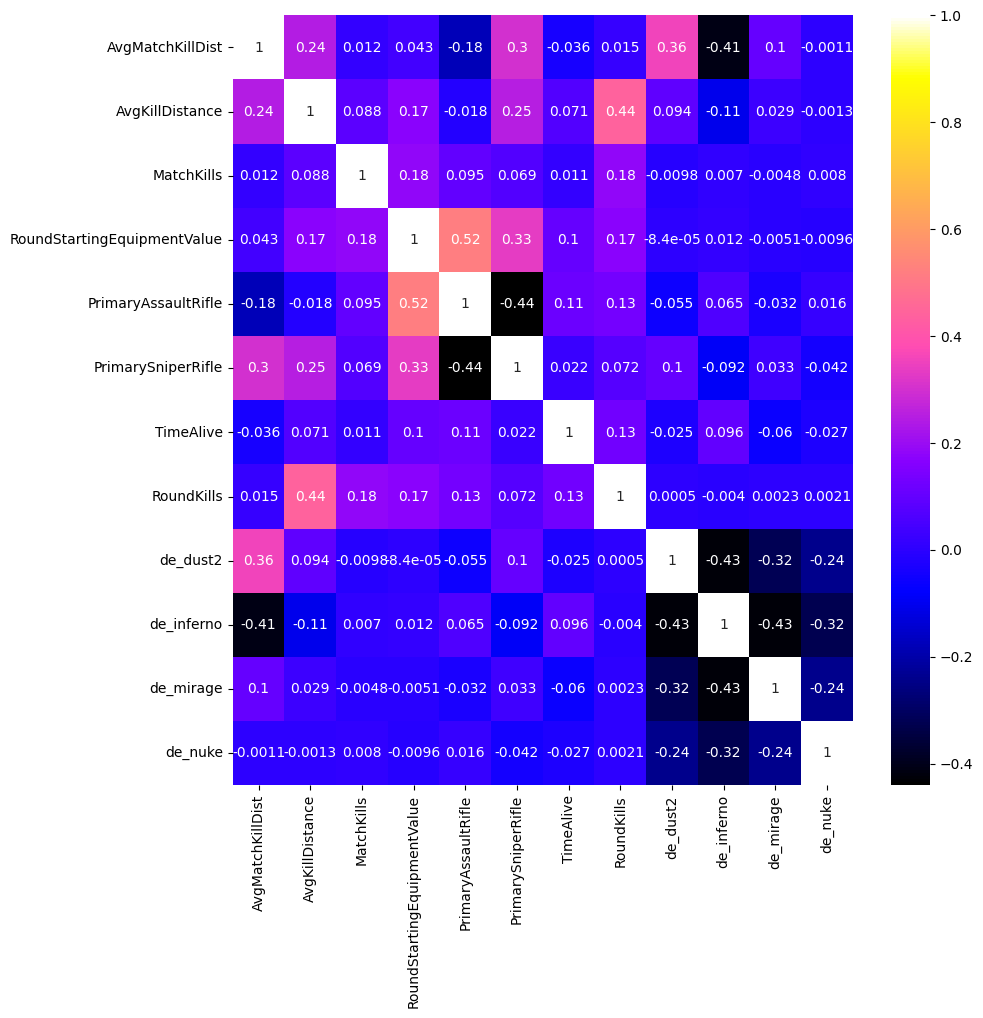

In [28]:
f, ax = plt.subplots(1, 1, figsize=(10, 10))
ax = sns.heatmap(df_select[df_select.describe().columns].corr(), annot=True, cmap='gnuplot2')

---

**Análisis**

---

Al agregar los mapas notamos que la correlación entre **"AvgMatchKillDist"** y el mapa **"de_dust2"** es bastante alta, en comparación a los demás. Esto puede hacer que el modelo mejore.

## Regresión Lineal con Variable Map

In [29]:
# Separamos la data en dos grupos: X (variables independientes) e y (variable dependiente)
x = df_select[['AvgKillDistance', 'PrimarySniperRifle', 'RoundStartingEquipmentValue', 'RoundKills', 'MatchKills', "de_dust2", "de_inferno", "de_mirage", "de_nuke"]] # Variables predictoras
y = df_select["AvgMatchKillDist"] # Variable a predecir

In [30]:
# Crear el modelo de regresion lineal
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=29) # Particion de los datos. 80% entrenamiento, 20% prueba
# Creamos el modelo
model = LinearRegression()
# Entrenamos el modelo
model.fit(x_train, y_train)
# Validamos el modelo
y_pred = model.predict(x_test)

In [31]:
# Evaluamos el modelo
print(f"R2: {r2_score(y_test, y_pred):.4f}") # Coeficiente de determinacion. Mide la proporcion de la varianza total de la variable dependiente que es explicada por la regresion
print(f"MSE: {mean_squared_error(y_test, y_pred):.4f}") # Error cuadratico medio. Mide la diferencia entre los valores predichos y los valores observados
print(f"MAE: {mean_absolute_error(y_test, y_pred):.4f}") # Error absoluto medio. Mide la diferencia entre los valores predichos y los valores observados
print(f"Score del modelo en entrenamiento: {model.score(x_train, y_train):.4f}") # Score del modelo en entrenamiento
print(f"Score del modelo en prueba: {model.score(x_test, y_test):.4f}") # Score del modelo en prueba

R2: 0.2974
MSE: 80527755764.2738
MAE: 190853.7185
Score del modelo en entrenamiento: 0.2979
Score del modelo en prueba: 0.2974


---

**Análisis**

---

* Podemos ver que el $R^{2}$ aumentó desde 0.1295 a 0.2974, lo que es un buen avance.
* El error cuadrático medio disminuyó a 80527755764.2738, aunque sigue siendo muy alto, por lo que no es un buen modelo.
* El error absoluto medio disminuyó a 190853.7185 lo que es un buen avance, pero sigue siendo muy alto, por lo que tampoco es un buen modelo.
* Se incluirá la variable categórica "Team" para ver si mejora el modelo.

In [32]:
# Guardamos los resultados del MAE (Error absoluto medio) en una lista
history_mae.append(mean_absolute_error(y_pred, y_test))

# Guardamos los resultados del R2 (Coeficiente de Determinación) en una lista
history_r2.append(model.score(x_train, y_train))

## Tratamiento de variable Team
Veremos si la variable "Team" tiene correlación con "AvgMatchKillDist". Puede que los equipos tengan un mejor desempeño en ciertos mapas.

In [33]:
# Tratamiento variable Team con One-Hot Encoding
data_transform = pd.get_dummies(df_select.Team)
df_select = pd.concat([df_select, data_transform], axis=1)
df_select

,AvgMatchKillDist,AvgKillDistance,MatchKills,RoundStartingEquipmentValue,PrimaryAssaultRifle,PrimarySniperRifle,Map,Team,TimeAlive,RoundKills,de_dust2,de_inferno,de_mirage,de_nuke,CounterTerrorist,Terrorist
0,501379.183091,0.000000,0,750,0.0,0.0,de_inferno,Terrorist,51.120249,0,0,1,0,0,False,True
1,208807.587297,0.000000,0,800,0.0,0.0,de_inferno,Terrorist,43.486626,0,0,1,0,0,False,True
2,381652.027911,0.000000,0,1000,0.0,0.0,de_inferno,Terrorist,37.354698,0,0,1,0,0,False,True
3,289754.503091,0.000000,0,850,0.0,0.0,de_inferno,Terrorist,47.678861,0,0,1,0,0,False,True
4,254527.691176,0.000000,0,1000,0.0,0.0,de_inferno,Terrorist,53.122511,0,0,1,0,0,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79152,768003.878843,0.000000,4,5600,1.0,0.0,de_mirage,CounterTerrorist,34.027207,0,0,0,1,0,True,False
79153,692262.605640,109345.366682,8,5500,1.0,0.0,de_mirage,CounterTerrorist,29.261054,1,0,0,1,0,True,False
79154,161310.783653,0.000000,5,4950,1.0,0.0,de_mirage,CounterTerrorist,59.147178,0,0,0,1,0,True,False
79155,984575.199373,0.000000,1,4950,0.0,1.0,de_mirage,CounterTerrorist,42.582843,0,0,0,1,0,True,False


In [34]:
# Tratamiento variable Team con One-Hot Encoding. Convertimos los valores True or False en 1 y 0
df_select["CounterTerrorist"] = df_select["CounterTerrorist"].astype(int)
df_select["Terrorist"] = df_select["Terrorist"].astype(int)
df_select

,AvgMatchKillDist,AvgKillDistance,MatchKills,RoundStartingEquipmentValue,PrimaryAssaultRifle,PrimarySniperRifle,Map,Team,TimeAlive,RoundKills,de_dust2,de_inferno,de_mirage,de_nuke,CounterTerrorist,Terrorist
0,501379.183091,0.000000,0,750,0.0,0.0,de_inferno,Terrorist,51.120249,0,0,1,0,0,0,1
1,208807.587297,0.000000,0,800,0.0,0.0,de_inferno,Terrorist,43.486626,0,0,1,0,0,0,1
2,381652.027911,0.000000,0,1000,0.0,0.0,de_inferno,Terrorist,37.354698,0,0,1,0,0,0,1
3,289754.503091,0.000000,0,850,0.0,0.0,de_inferno,Terrorist,47.678861,0,0,1,0,0,0,1
4,254527.691176,0.000000,0,1000,0.0,0.0,de_inferno,Terrorist,53.122511,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79152,768003.878843,0.000000,4,5600,1.0,0.0,de_mirage,CounterTerrorist,34.027207,0,0,0,1,0,1,0
79153,692262.605640,109345.366682,8,5500,1.0,0.0,de_mirage,CounterTerrorist,29.261054,1,0,0,1,0,1,0
79154,161310.783653,0.000000,5,4950,1.0,0.0,de_mirage,CounterTerrorist,59.147178,0,0,0,1,0,1,0
79155,984575.199373,0.000000,1,4950,0.0,1.0,de_mirage,CounterTerrorist,42.582843,0,0,0,1,0,1,0


## Mapa de Calor V3
* Se incluye variable categórica Team

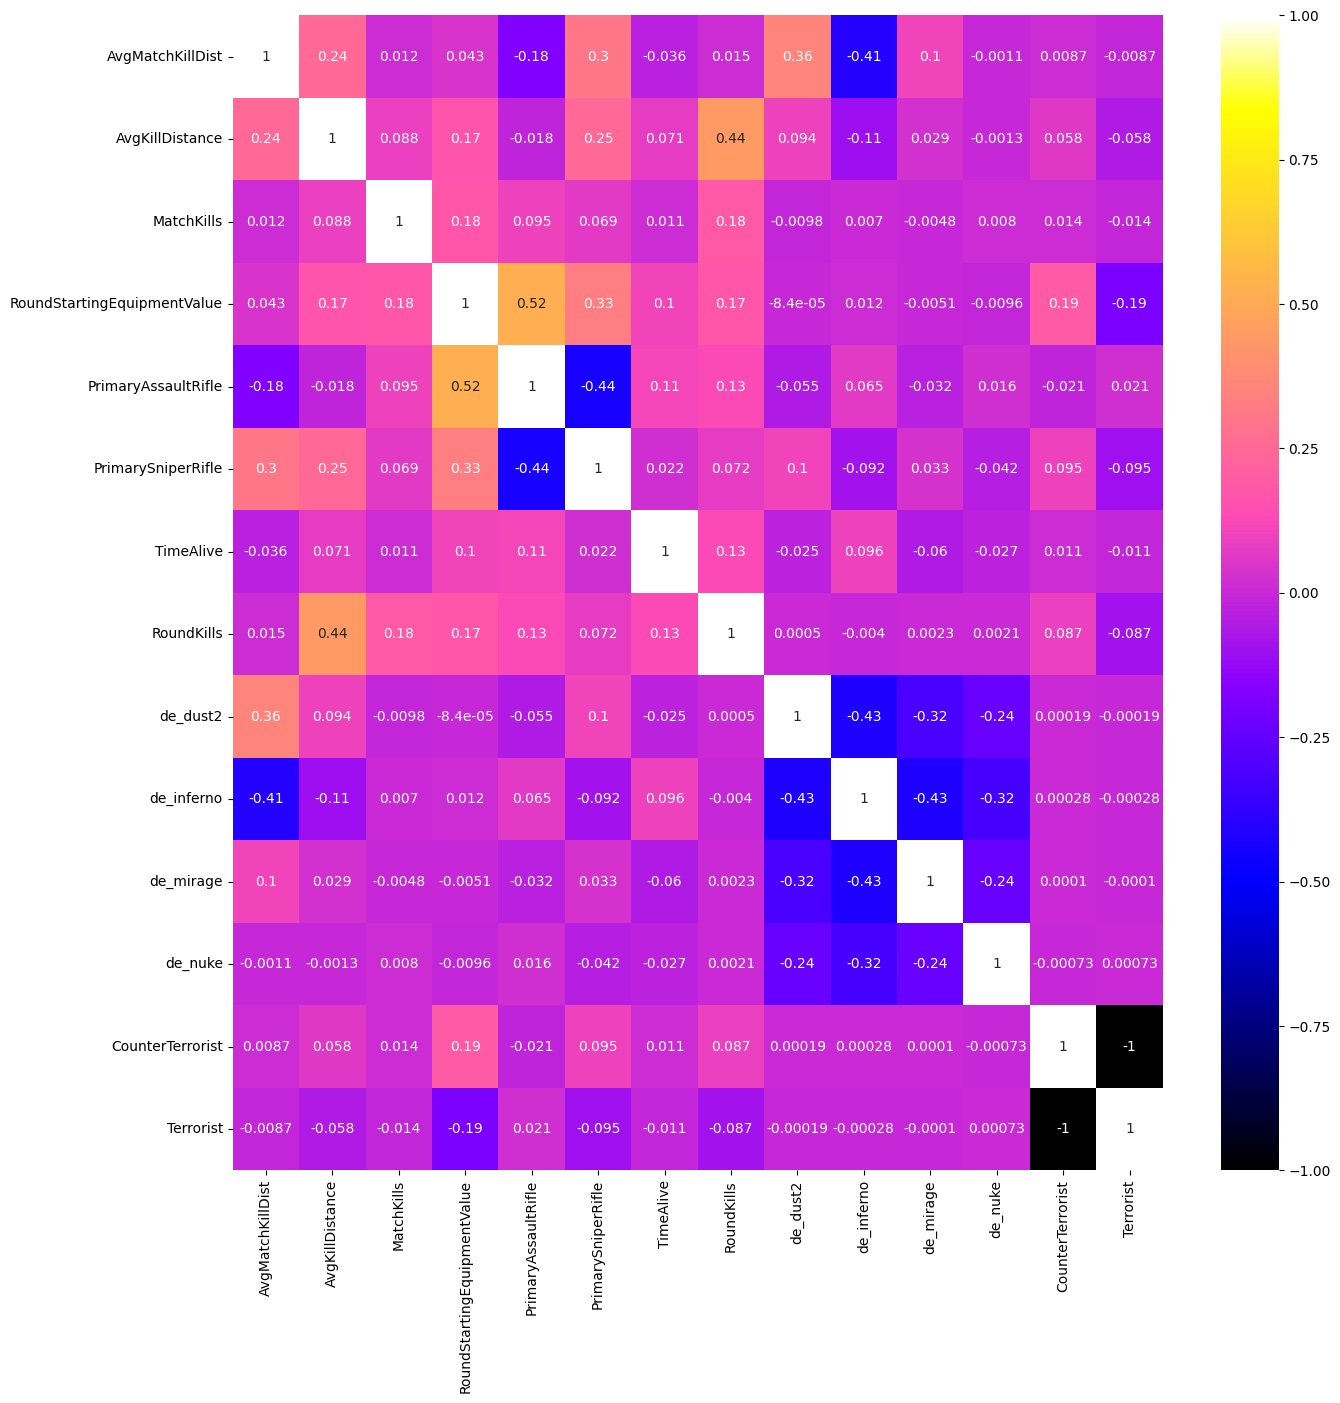

In [35]:
f, ax = plt.subplots(1, 1, figsize=(15, 15))
ax = sns.heatmap(df_select[df_select.describe().columns].corr(), annot=True, cmap='gnuplot2')

---

**Análisis**

---

Al agregar las variables de equipo nuevamente vemos que la correlación con AvgMatchKillDist bastante es baja, suponemos que no afectará mucho al modelo.

## Regresión Lineal con variable Team

In [36]:
# Separamos la data en dos grupos: X (variables independientes) e y (variable dependiente)
x = df_select[['AvgKillDistance', 'PrimarySniperRifle', 'RoundStartingEquipmentValue', 'RoundKills', 'MatchKills', "de_dust2", "de_inferno", "de_mirage", "de_nuke", "CounterTerrorist", "Terrorist"]] # Variables predictoras
y = df_select["AvgMatchKillDist"] # Variable a predecir

In [37]:
# Crear el modelo de regresion lineal
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=29) # Particion de los datos. 80% entrenamiento, 20% prueba
# Creamos el modelo
model = LinearRegression()
# Entrenamos el modelo
model.fit(x_train, y_train)
# Validamos el modelo
y_pred = model.predict(x_test)

In [38]:
# Evaluamos el modelo
print(f"R2: {r2_score(y_test, y_pred):.4f}") # Coeficiente de determinacion. Mide la proporcion de la varianza total de la variable dependiente que es explicada por la regresion
print(f"MSE: {mean_squared_error(y_test, y_pred):.4f}") # Error cuadratico medio. Mide la diferencia entre los valores predichos y los valores observados
print(f"MAE: {mean_absolute_error(y_test, y_pred):.4f}") # Error absoluto medio. Mide la diferencia entre los valores predichos y los valores observados
print(f"Score del modelo en entrenamiento: {model.score(x_train, y_train):.4f}") # Score del modelo en entrenamiento
print(f"Score del modelo en prueba: {model.score(x_test, y_test):.4f}") # Score del modelo en prueba

R2: 0.2975
MSE: 80518148101.9343
MAE: 190827.2270
Score del modelo en entrenamiento: 0.2980
Score del modelo en prueba: 0.2975


---

**Análisis**

---

* Esta vez, como habiamos pensado, el $R^{2}$ aumentó de forma minima a 0.2975. Los equipos no afectan practicamente en nada.
* El error cuadrático medio disminuyo ligeramente a 80518148101.9343 debido a la inclusión de la variable categórica "Team".
* El error absoluto medio disminuyó ligeramente a 190827.2270 igualmente producto de la inclusión de la variable categórica "Team".
* Se incluirá la variable categórica "Team" para ver si mejora el modelo.

In [39]:
# Guardamos los resultados del MAE (Error absoluto medio) en una lista
history_mae.append(mean_absolute_error(y_pred, y_test))

# Guardamos los resultados del R2 (Coeficiente de Determinación) en una lista
history_r2.append(model.score(x_train, y_train))

In [40]:
history_mae

[219973.58923095136, 190853.71850647771, 190827.2269994421]

In [41]:
history_r2

[0.13607932075469176, 0.2979272476344239, 0.2979904934624641]

## Graficas para comparar Resultados

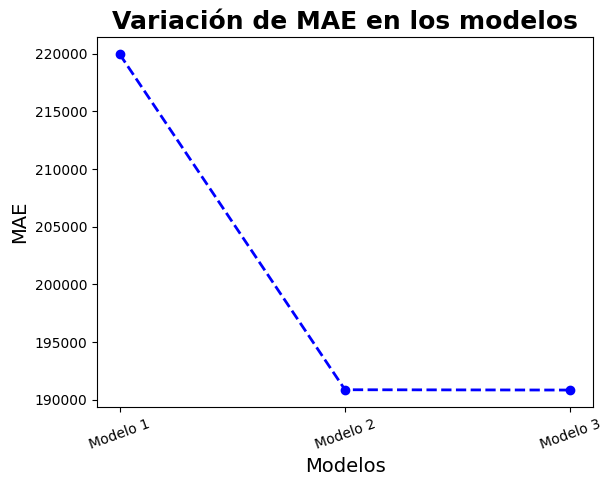

In [42]:
plt.title("Variación de MAE en los modelos", fontsize=18, fontweight="bold")
plt.xlabel("Modelos", fontsize=14); plt.ylabel("MAE", fontsize=14)
plt.xticks([0, 1, 2], ['Modelo 1', 'Modelo 2', 'Modelo 3'], rotation=20)
plt.plot(history_mae, 'bo--', linewidth=2, markersize=6);

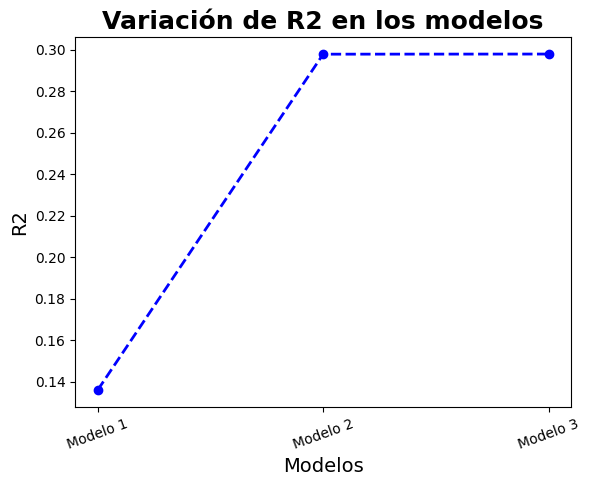

In [43]:
plt.title("Variación de R2 en los modelos", fontsize=18, fontweight="bold")
plt.xlabel("Modelos", fontsize=14); plt.ylabel("R2", fontsize=14)
plt.xticks([0, 1, 2], ['Modelo 1', 'Modelo 2', 'Modelo 3'], rotation=20)
plt.plot(history_r2, 'bo--', linewidth=2, markersize=6);

## Conclusiones

* El modelo mejoró notablemente al incluir las variables categóricas "Map". El $R^{2}$ aumentó de 0.1285 a 0.2974. En las gráficas se puede ver tambien ese aumento. Esto nos indica que ciertamente dependiendo el mapa el promedio de la distancia entre kills en la partida variará. Viendo el mapa de calor podemos ver que el mapa **"de_dust2"** es el que tiene mayor correlación con **"AvgMatchKillDist"**, por lo que asumimos que es el mapa donde se da la mayor distancia entre kills en una partida.
* La variable Team no afecta en nada al modelo, por lo que podemos asumir que los equipos no afectan en nada al promedio de la distancia entre kills en una partida. Esto puede ser debido a los bandos CounterTerrorist o Terrorist no tienen una ventaja sobre el otro, dejando las habilidades individuales del jugador de lado.
* El modelo ciertamente no es bueno del todo y es posible mejorarlo más.